In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
import pandas as pd

# Load dataset
df = pd.read_csv('titanic.csv')  # Replace with actual path

# Check column names
print("Columns:", df.columns)

# View missing values before imputation
print("Missing values before:\n", df.isnull().sum())

# Handle numeric columns
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)  # median handles skew better

if 'Fare' in df.columns:
    df['Fare'].fillna(df['Fare'].mean(), inplace=True)  # mean is okay here

# Handle categorical columns
if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

if 'Embark_town' in df.columns:
    df['Embark_town'].fillna(df['Embark_town'].mode()[0], inplace=True)

# Handle 'Cabin' (many missing values, usually string-type)
if 'Cabin' in df.columns:
    df['Cabin'].fillna('Unknown', inplace=True)

# View missing values after imputation
print("Missing values after:\n", df.isnull().sum())

Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Missing values before:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing values after:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_7516\391856668.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # median handles skew better
C:\Users\HP\AppData\Local\Temp\ipykernel_7516\391856668.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [9]:
# Example: one-hot encode 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # 'male' → 1, 'female' → 0


In [11]:
df['Sex'], _ = pd.factorize(df['Sex'])

In [12]:
# Identify all categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding to all of them
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [13]:
df.isnull().sum()  # Check for NaNs
df.dropna(inplace=True)  # Or fill missing values

In [14]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown
0,1,0,3,0,22.0,1,0,7.2500,False,True,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,1,38.0,1,0,71.2833,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,True,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,True,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,0,35.0,0,0,8.0500,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,False,True,...,False,False,False,False,False,False,False,False,False,True
887,888,1,1,1,19.0,0,0,30.0000,False,True,...,False,False,False,False,False,False,False,False,False,False
888,889,0,3,1,28.0,1,2,23.4500,False,True,...,False,False,False,False,False,False,False,False,False,True
889,890,1,1,0,26.0,0,0,30.0000,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [46]:
from sklearn.preprocessing import StandardScaler

# 1. Identify numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# 2. Standardize the numerical columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [48]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown
0,-1.730108,-0.789272,0.827377,-0.737695,-0.565736,0.432793,-0.473674,-0.502445,False,True,...,False,False,False,False,False,False,False,False,False,True
1,-1.726220,1.266990,-1.566107,1.355574,0.663861,0.432793,-0.473674,0.786845,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-1.722332,1.266990,0.827377,1.355574,-0.258337,-0.474545,-0.473674,-0.488854,False,True,...,False,False,False,False,False,False,False,False,False,True
3,-1.718444,1.266990,-1.566107,1.355574,0.433312,0.432793,-0.473674,0.420730,False,True,...,False,False,False,False,False,False,False,False,False,False
4,-1.714556,-0.789272,0.827377,-0.737695,0.433312,-0.474545,-0.473674,-0.486337,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.789272,-0.369365,-0.737695,-0.181487,-0.474545,-0.473674,-0.386671,False,True,...,False,False,False,False,False,False,False,False,False,True
887,1.718444,1.266990,-1.566107,1.355574,-0.796286,-0.474545,-0.473674,-0.044381,False,True,...,False,False,False,False,False,False,False,False,False,False
888,1.722332,-0.789272,0.827377,1.355574,-0.104637,0.432793,2.008933,-0.176263,False,True,...,False,False,False,False,False,False,False,False,False,True
889,1.726220,1.266990,-1.566107,-0.737695,-0.258337,-0.474545,-0.473674,-0.044381,False,False,...,False,False,False,False,False,False,False,False,False,False


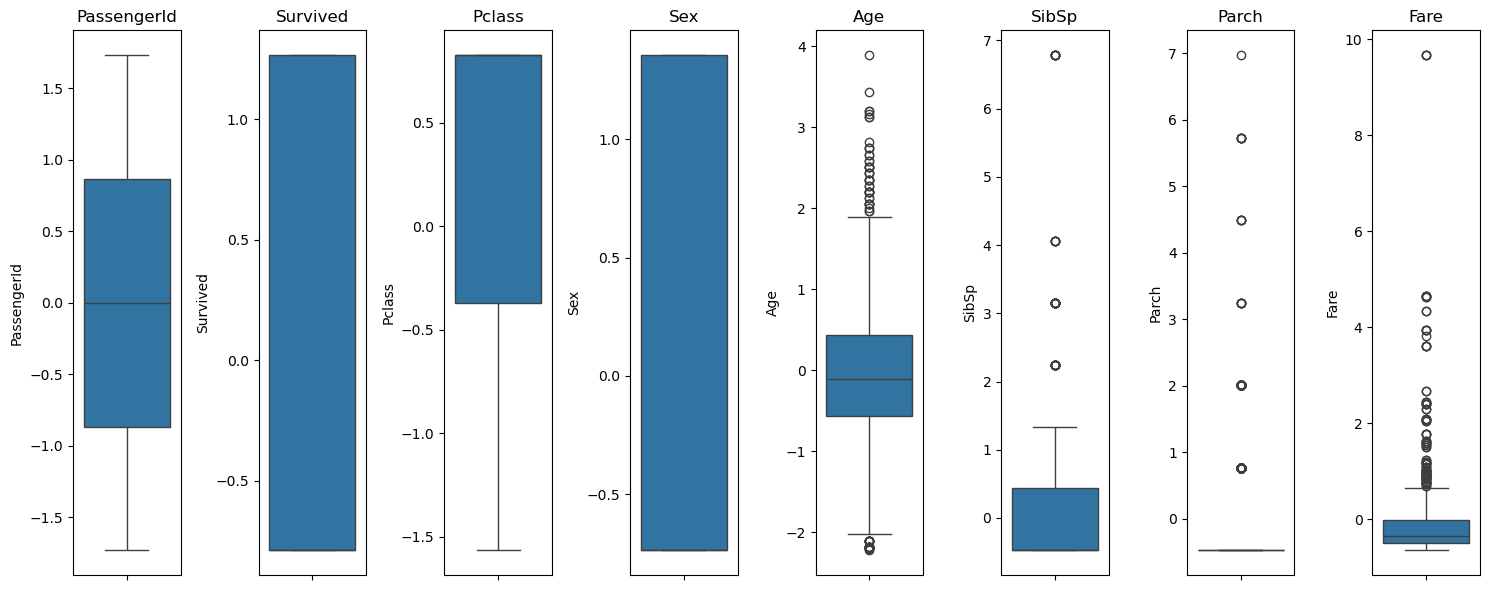

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(15, 6))

# Loop through numerical columns and plot boxplots
for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns, 1):
    plt.subplot(1, len(df.select_dtypes(include=['int64', 'float64']).columns), i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [52]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


In [54]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Remove outliers
df = remove_outliers_iqr(df, numeric_cols)


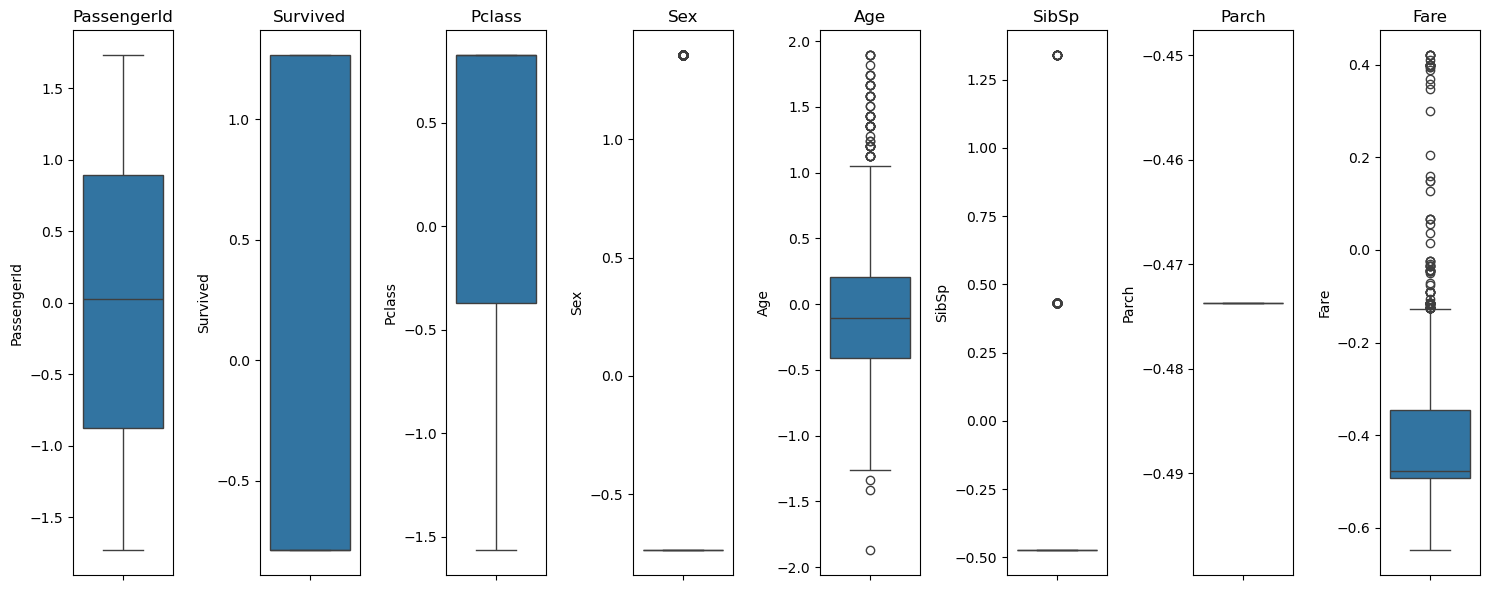

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(15, 6))

# Loop through numerical columns and plot boxplots
for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns, 1):
    plt.subplot(1, len(df.select_dtypes(include=['int64', 'float64']).columns), i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()
